In [1]:
%matplotlib inline

# 从vnpy中加载CTA回测模块中的组件
from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME

# 从当前目录加载策略类代码
from strategyBollingerBot import BollingerBotStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20100101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(300000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象

# 使用策略类中的默认参数，则参数配置字典留空
d = {}

# 使用优化后的参数
"""
d = {
    'bollLength':32,         # 通道窗口数
    'entryDev':2.4,          # 开仓偏差
    'exitDev':1.2,           # 平仓偏差
    'trailingPrcnt':0.4,     # 移动止损百分比
    'maLength':14,           # 过滤用均线窗口
    'initDays':10,           # 初始化数据所用的天数
    'fixedSize':1            # 每次交易的数量
}  
"""

# 初始化策略
engine.initStrategy(BollingerBotStrategy, d)    

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2017-08-06 19:30:15.485000	开始载入数据
2017-08-06 19:30:15.643000	载入完成，数据量：444750
2017-08-06 19:30:15.643000	开始回测
2017-08-06 19:30:15.643000	策略初始化完成
2017-08-06 19:30:15.643000	策略启动完成
2017-08-06 19:30:15.643000	开始回放数据
2017-08-06 19:30:26.580000	数据回放结束


In [7]:
# 显示逐日回测结果
df = engine.showDailyResult()

2017-08-06 19:30:30.385000	计算按日统计结果


AttributeError: 'Series' object has no attribute 'rolling'

2017-08-06 19:30:36.800000	计算回测结果
2017-08-06 19:30:36.836000	------------------------------
2017-08-06 19:30:36.836000	第一笔交易：	2010-04-16 14:32:00
2017-08-06 19:30:36.836000	最后一笔交易：	2017-03-17 10:11:00
2017-08-06 19:30:36.836000	总交易次数：	969.0
2017-08-06 19:30:36.836000	总盈亏：	404,541.66
2017-08-06 19:30:36.836000	最大回撤: 	-72,450.43
2017-08-06 19:30:36.836000	平均每笔盈利：	417.48
2017-08-06 19:30:36.836000	平均每笔滑点：	120.0
2017-08-06 19:30:36.836000	平均每笔佣金：	51.62
2017-08-06 19:30:36.836000	胜率		36.74%
2017-08-06 19:30:36.836000	盈利交易平均值	5,877.02
2017-08-06 19:30:36.836000	亏损交易平均值	-2,753.14
2017-08-06 19:30:36.836000	盈亏比：	2.13


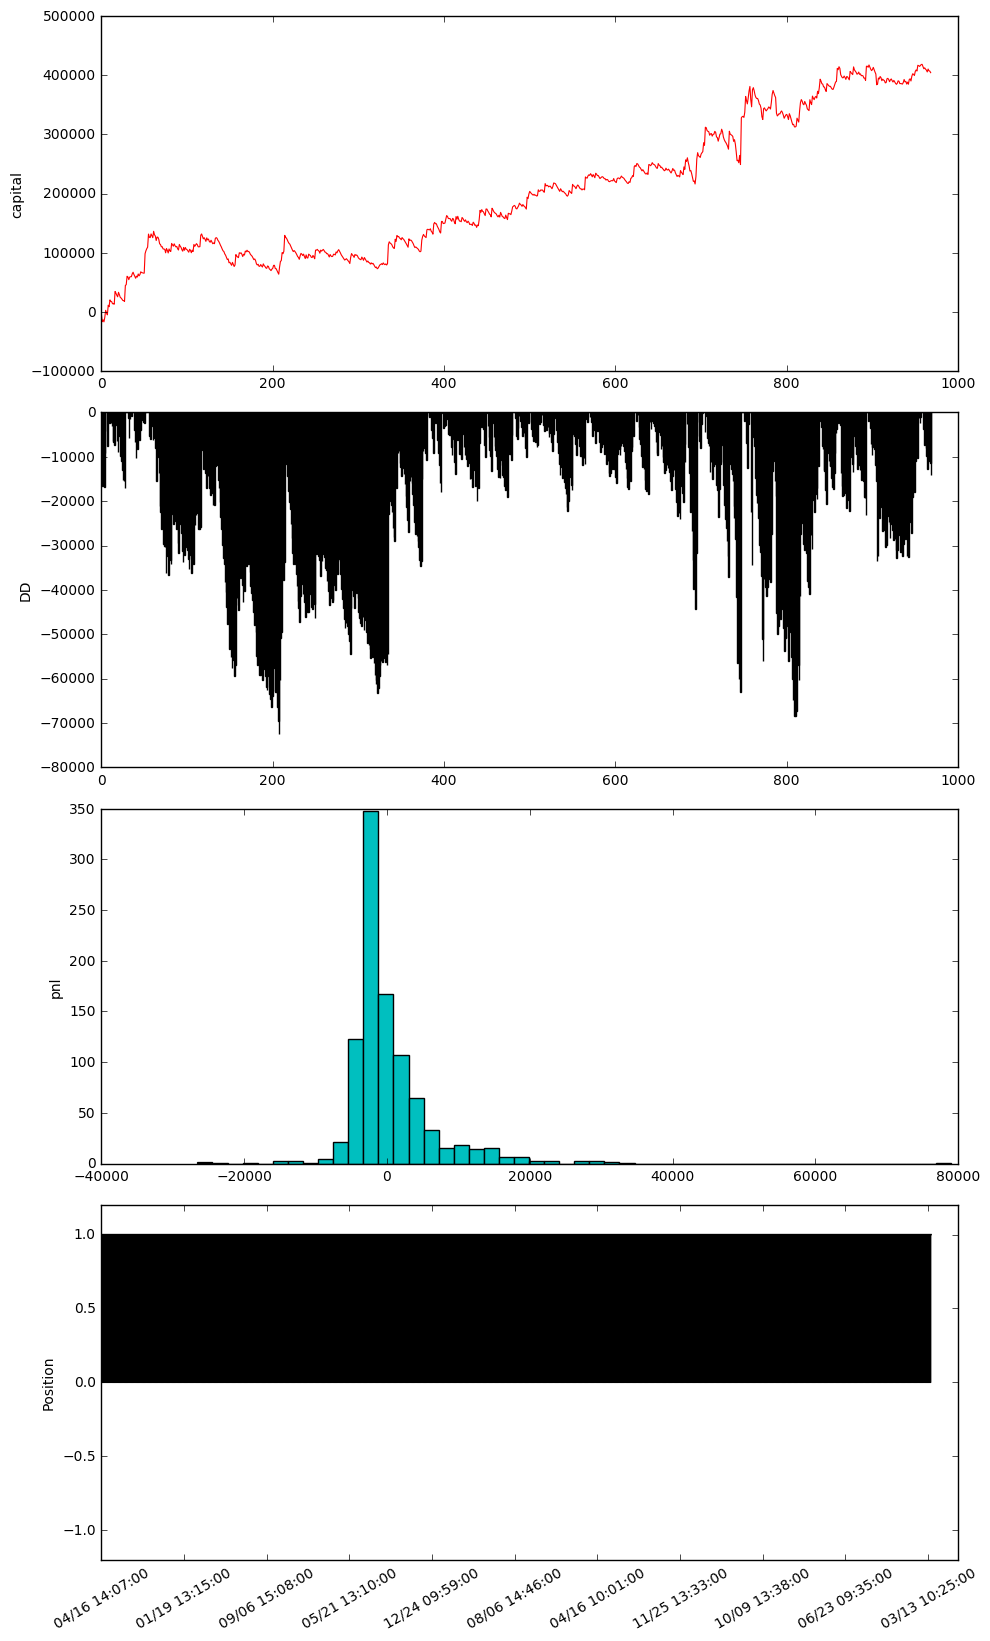

In [8]:
# 显示逐笔回测结果，和逐日回测的统计逻辑不同，因此可以用来检查结果是否正确
engine.showBacktestingResult()

In [9]:
# 显示前50条成交记录
for i in range(50):
    d = engine.tradeDict[str(i+1)].__dict__
    print u'时间%s, 成交编号：%s，方向：%s，开平：%s，数量：%s，价格：%s' %(d['tradeTime'], d['tradeID'], d['direction'], 
                                                                            d['offset'], d['volume'], d['price'])

时间2010-04-16 14:07:00, 成交编号：1，方向：多，开平：开仓，数量：1，价格：3448.0
时间2010-04-16 14:32:00, 成交编号：2，方向：空，开平：平仓，数量：1，价格：3436.0
时间2010-04-30 15:04:00, 成交编号：3，方向：多，开平：开仓，数量：1，价格：3118.8
时间2010-05-04 09:16:00, 成交编号：4，方向：空，开平：平仓，数量：1，价格：3077.0
时间2010-05-05 13:39:00, 成交编号：5，方向：多，开平：开仓，数量：1，价格：3063.4
时间2010-05-06 09:23:00, 成交编号：6，方向：空，开平：平仓，数量：1，价格：3074.4
时间2010-05-11 09:20:00, 成交编号：7，方向：多，开平：开仓，数量：1，价格：2947.8
时间2010-05-11 09:46:00, 成交编号：8，方向：空，开平：平仓，数量：1，价格：2937.0
时间2010-05-13 13:38:00, 成交编号：9，方向：多，开平：开仓，数量：1，价格：2873.6
时间2010-05-13 14:45:00, 成交编号：10，方向：空，开平：平仓，数量：1，价格：2900.0
时间2010-05-18 13:23:00, 成交编号：11，方向：多，开平：开仓，数量：1，价格：2734.8
时间2010-05-18 14:27:00, 成交编号：12，方向：空，开平：平仓，数量：1，价格：2774.4
时间2010-05-28 09:16:00, 成交编号：13，方向：多，开平：开仓，数量：1，价格：2933.6
时间2010-05-28 09:44:00, 成交编号：14，方向：空，开平：平仓，数量：1，价格：2920.2
时间2010-06-03 11:27:00, 成交编号：15，方向：多，开平：开仓，数量：1，价格：2801.4
时间2010-06-03 13:11:00, 成交编号：16，方向：空，开平：平仓，数量：1，价格：2790.8
时间2010-06-09 13:51:00, 成交编号：17，方向：多，开平：开仓，数量：1，价格：2735.8
时间2010-06-09 15:05:00, 成交编号：18，方向：空，开平：平

In [10]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('capital')            # 设置优化排序的目标是策略净盈利

setting.addParameter('bollLength', 20, 40, 2)  # 设置参数优化范围
#setting.addParameter('bollLength', 32)          # 设置参数优化值

#setting.addParameter('entryDev', 2, 4, 0.2)  
#setting.addParameter('entryDev', 2.4)  

#setting.addParameter('exitDev', 0, 2, 0.2)
#setting.addParameter('exitDev', 1.2)

#setting.addParameter('trailingPrcnt', 0.2, 1, 0.2)
#setting.addParameter('maLength', 2, 20, 2)

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(BollingerBotStrategy, setting)
print u'耗时：%s' %(time.time()-start)

InvalidBSON: 